In [22]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Open the file and read its content as a single string
with open("/home/uceckz0/Project/cgcnn/jobs/cgcnn_qmof.o193978", 'r') as file:
    content = file.read()

# Patterns for identifying training and validation lines
train_line_pattern = re.compile(r'^(?!.*Validation).*Loss (\d+\.\d+).*MAE (\d+\.\d+)', re.MULTILINE)
validation_line_pattern = re.compile(r'^.*Validation.*Loss (\d+\.\d+).*MAE (\d+\.\d+)', re.MULTILINE)

train_matches = train_line_pattern.findall(content)
validation_matches = validation_line_pattern.findall(content)


In [36]:
# Extracting training loss and MAE values
train_loss_values = [float(match[0]) for match in train_matches]
train_loss_values = train_loss_values[:42000]
train_mae_values = [float(match[1]) for match in train_matches]
train_mae_values = train_mae_values[:42000]

# Extracting validation loss and MAE values
validation_loss_values = [float(match[0]) for match in validation_matches]
validation_mae_values = [float(match[1]) for match in validation_matches]

train_loss_values[:5], train_mae_values[:5], validation_loss_values[:5], validation_mae_values[:5]  # Display the first 5 of each for brevity


([1.4388, 1.4315, 0.8621, 0.6017, 0.3588],
 [1.123, 1.094, 0.909, 0.709, 0.544],
 [0.3854, 0.3033, 0.2808, 0.3212, 0.3392],
 [0.57, 0.472, 0.476, 0.48, 0.523])

In [37]:
# Parameters
epochs = 6000
measurements_per_epoch = 7

# Create an extended epoch array for plotting train_loss
# Each epoch number is repeated measurements_per_epoch times
extended_epochs = np.repeat(np.arange(1, epochs + 1), measurements_per_epoch)

# Ensure the extended_epochs array is the same length as train_loss
assert len(extended_epochs) == len(train_loss_values)

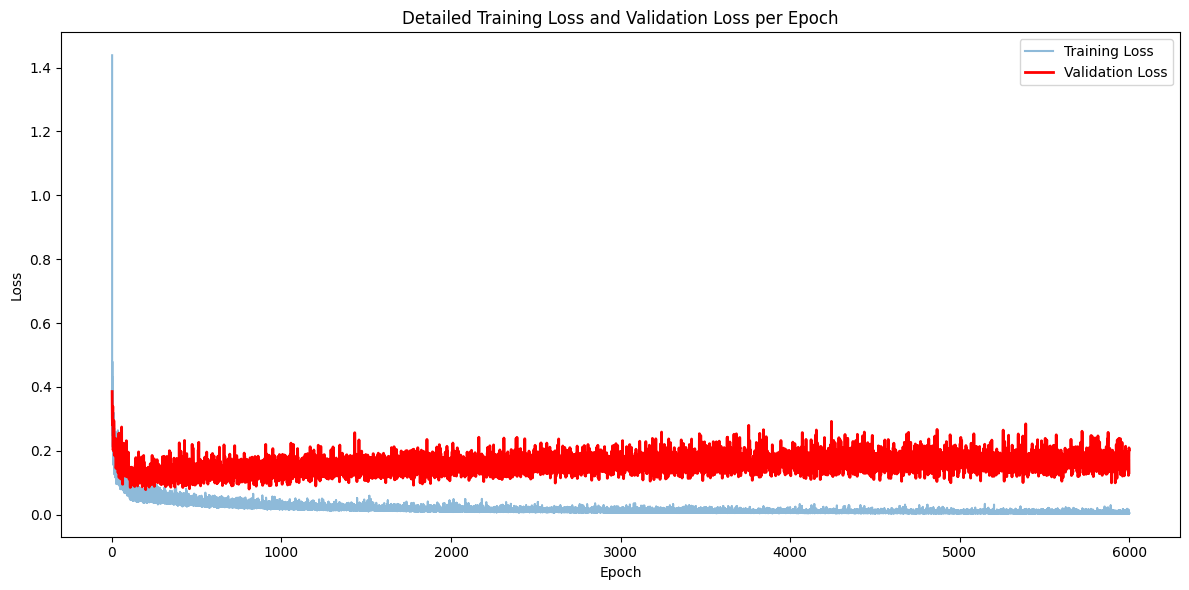

In [35]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot all train_loss values
plt.plot(extended_epochs, train_loss_values, label='Training Loss', alpha=0.5)  # Alpha for better visibility

# For val_loss, plot it against the original epoch numbers. We'll use every 7th point from the extended_epochs for alignment.
plt.plot(np.arange(1, epochs + 1), validation_loss_values, label='Validation Loss', color='red', linewidth=2)

plt.title('Detailed Training Loss and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

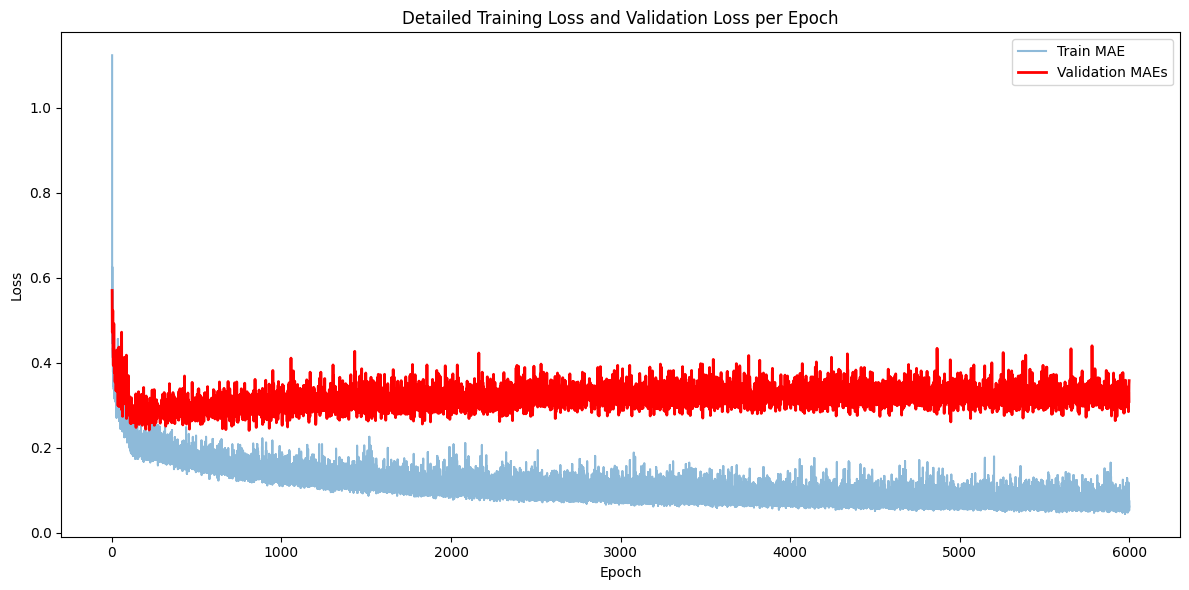

In [38]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot all train_loss values
plt.plot(extended_epochs, train_mae_values, label='Train MAE', alpha=0.5)  # Alpha for better visibility

# For val_loss, plot it against the original epoch numbers. We'll use every 7th point from the extended_epochs for alignment.
plt.plot(np.arange(1, epochs + 1), validation_mae_values, label='Validation MAEs', color='red', linewidth=2)

plt.title('Detailed Training Loss and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()